In [1]:
import numpy as np
import sounddevice as sd


from source.processing import *
from config.settings import PROCESSING

from source.training import get_model

from utils.plotting import plot_spectrogram

2022-05-18 20:37:52.303511: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-18 20:37:52.303538: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
freq = fft_frequencies(sr=PROCESSING.sampling_rate, n_fft=PROCESSING.n_fft)
log_freq = log_scale_freq(freq, log_base=PROCESSING.log_base, num_samples=PROCESSING.num_samples)[0]

In [3]:
x_train, y_train, x_test, y_test, scalars = load_split_tensors(PROCESSING.tensors_folder)

In [47]:
batch = np.load('data/predictions/tensors/pred_p2p_test.npy')

In [48]:
restored_tensor = batch_to_tensor(batch)

In [49]:
restored_sg = tensor_to_spectrogram(restored_tensor, scalars['y'])

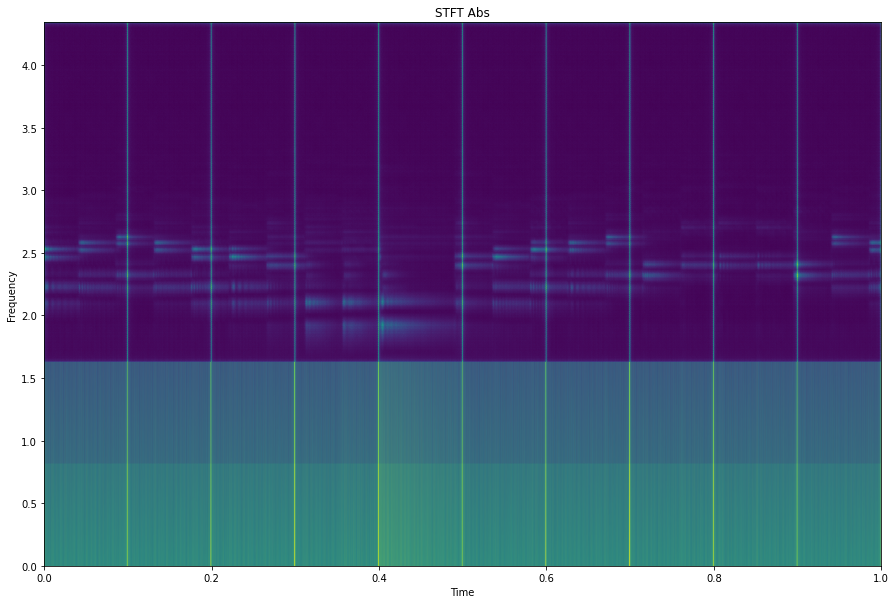

In [51]:
plot_spectrogram(log_freq, restored_sg, mode='Abs')

In [52]:
rescaled_restored_sg = inverse_log_scale(log_freq, restored_sg)

In [53]:
restored_audio = spectrogram_to_wav(rescaled_restored_sg, PROCESSING.sampling_rate)(win_length=PROCESSING.win_length, n_fft=PROCESSING.n_fft)

In [54]:
wavfile.write('data/predictions/audio/pred.wav', PROCESSING.sampling_rate, restored_audio[0])

In [55]:
sd.play(*restored_audio)

In [56]:
sd.stop()

In [57]:
original_tensor = batch_to_tensor(y_test[:10])

In [58]:
original_sg = tensor_to_spectrogram(original_tensor, scalar=scalars['y'])

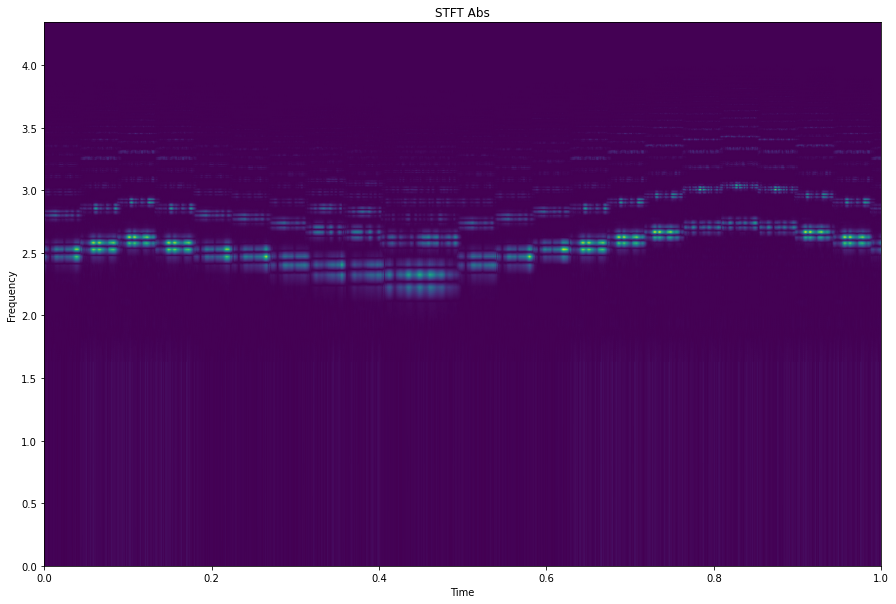

In [60]:
plot_spectrogram(log_freq, original_sg, mode='Abs')

In [61]:
original = spectrogram_to_wav(inverse_log_scale(log_freq, original_sg))()

In [74]:
sd.play(*original)

In [63]:
sd.stop()

In [75]:
x_tensor = batch_to_tensor(x_test[:10])

In [84]:
mix = np.stack((restored_tensor[:, :, 0], original_tensor[:, :, 1]), axis=2)

In [85]:
mix.shape

(512, 2560, 2)

In [86]:
mix_sg = tensor_to_spectrogram(mix, scalar=scalars['y'])

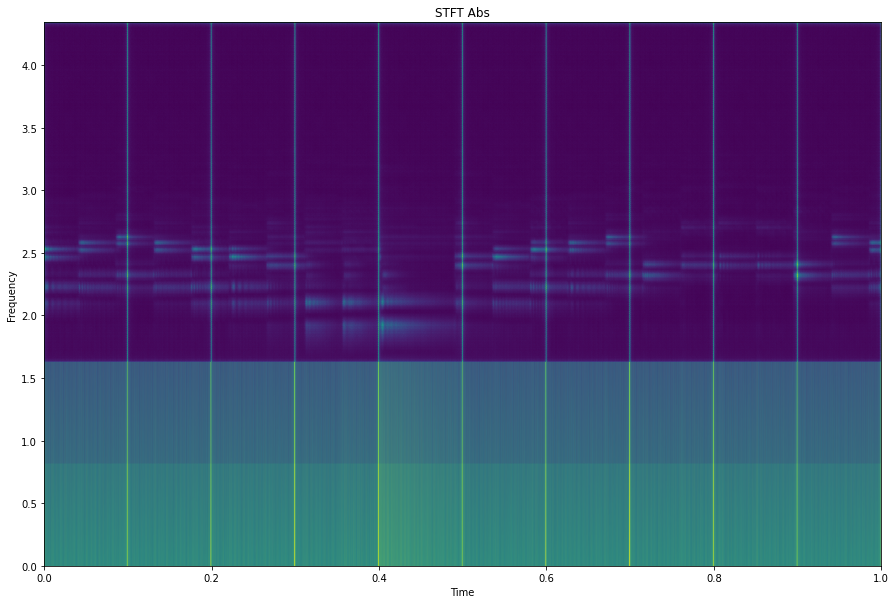

In [87]:
plot_spectrogram(log_freq, mix_sg, mode='Abs')

In [88]:
rescaled_mix_sg = inverse_log_scale(log_freq, mix_sg)

In [89]:
mix_audio = spectrogram_to_wav(rescaled_mix_sg)()

In [92]:
sd.play(*mix_audio)

In [96]:
wavfile.write('data/predictions/audio/original.wav', PROCESSING.sampling_rate, original[0])

In [93]:
sd.stop()